### **Car Price Predication**


- **Importing require library for performing EDA, Data Wrangling and data cleaning**

In [100]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [101]:
# Importing dataset excel file using pandas.
df= pd.read_csv('CarPrice.csv')

In [102]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
pd.set_option('display.max_columns',None) # # This will enable us to see truncated columns
df.head(30)

No. of Rows : 205
No. of Columns : 26


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


In [103]:
df["brand"] = df["CarName"].str.extract(r'(\w+)')

In [104]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [105]:
# As we have 24 columns lets sort columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['car_ID', 'symboling', 'curbweight', 'enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'], float64: ['wheelbase', 'carlength', 'carwidth', 'carheight', 'boreratio', 'stroke', 'compressionratio', 'price'], object: ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand']}

#### Observation:
- **This dataset contain 205 rows and 27 columns.**
- **Our target feature is Price.**

### **Data Integrity Check**

In [106]:
# Spliting data in Numeric and categorical Variable.
Numerical = ['symboling', 'wheelbase', 'carlength','carwidth', 'carheight', 'curbweight',
             'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm' , 'citympg' , 'citympg' ,'price' ]

Categorical = [ 'brand' , 'fueltype' , 'aspiration', 'doornumber' , 'carbody', 'drivewheel', 
                'enginelocation', 'enginetype' , 'cylindernumber', 'fuelsystem']

- **Dataset can contain whitespaces, missing value, duplicates entries, let investigate integrity of data before proceeding for further analysis.**

In [107]:
df.duplicated().sum() # This will detect duplicate entries in dataset

0

In [108]:
df.shape

(205, 27)

In [109]:
pd.set_option('display.max_rows',None)
for i in Categorical :
    print(i)
    print(df[i].value_counts())
    print('='*100)

brand
toyota        31
nissan        17
mazda         15
honda         13
mitsubishi    13
subaru        12
peugeot       11
volvo         11
volkswagen     9
dodge          9
buick          8
bmw            8
audi           7
plymouth       7
saab           6
isuzu          4
porsche        4
alfa           3
chevrolet      3
jaguar         3
vw             2
maxda          2
renault        2
toyouta        1
vokswagen      1
Nissan         1
mercury        1
porcshce       1
Name: brand, dtype: int64
fueltype
gas       185
diesel     20
Name: fueltype, dtype: int64
aspiration
std      168
turbo     37
Name: aspiration, dtype: int64
doornumber
four    115
two      90
Name: doornumber, dtype: int64
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
drivewheel
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
enginelocation
front    202
rear       3
Name: enginelocation, dtype: int64
enginetype
ohc 

In [110]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
brand               0
dtype: int64

#### Comment :
<b> No Missing Value is Present.

We are Now Yes To Go Further !!!</b>

## Statistical Matrix

In [111]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
car_ID,205.000000,103.000000,59.322565,1.000000,52.000000,103.000000,154.000000,205.000000
symboling,205.000000,0.834146,1.245307,-2.000000,0.000000,1.000000,2.000000,3.000000
wheelbase,205.000000,98.756585,6.021776,86.600000,94.500000,97.000000,102.400000,120.900000
carlength,205.000000,174.049268,12.337289,141.100000,166.300000,173.200000,183.100000,208.100000
carwidth,205.000000,65.907805,2.145204,60.300000,64.100000,65.500000,66.900000,72.300000
carheight,205.000000,53.724878,2.443522,47.800000,52.000000,54.100000,55.500000,59.800000
curbweight,205.000000,2555.565854,520.680204,1488.000000,2145.000000,2414.000000,2935.000000,4066.000000
enginesize,205.000000,126.907317,41.642693,61.000000,97.000000,120.000000,141.000000,326.000000
boreratio,205.000000,3.329756,0.270844,2.540000,3.150000,3.310000,3.580000,3.940000
stroke,205.000000,3.255415,0.313597,2.070000,3.110000,3.290000,3.410000,4.170000


### Observation :
1. **Average car price is 13276 while maximum price is 45400.**

In [112]:
df.describe(include=object).style.background_gradient(cmap='summer_r')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,brand
count,205,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8,28
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi,toyota
freq,6,185,168,115,96,120,202,148,159,94,31


### Observation :
1. Most of car used gas as fuel type
2. Majority of car have 4 doors.
3. total 6 models of toyota highest in dataset
4. preferd engine location is front

# EDA 

### Exploring Fuel Type

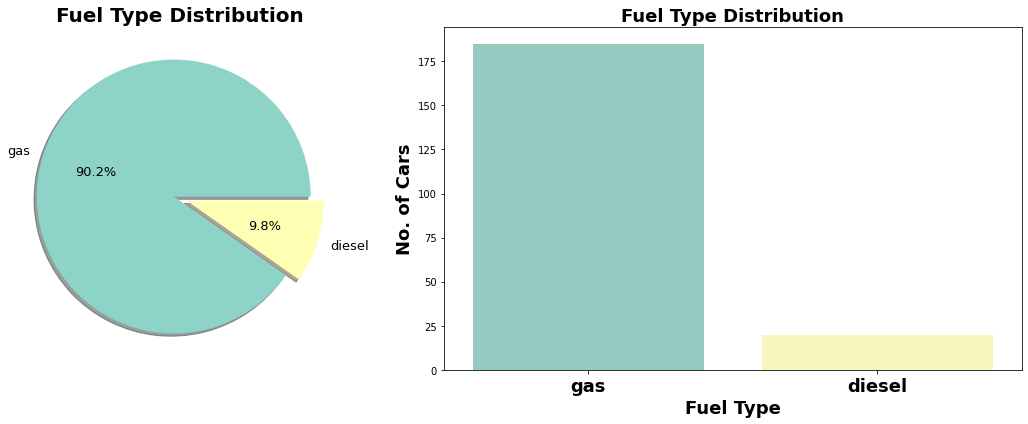

In [113]:
# Counting Fuel type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set3')
f,ax=plt.subplots(1,2,figsize=(16,6))
df['fueltype'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Fuel Type Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('fueltype',data=df,ax=ax[1])
ax[1].set_title('Fuel Type Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Fuel Type",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Cars",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.tight_layout()
plt.show()

- **Plot of Fuel Type Vs Price**

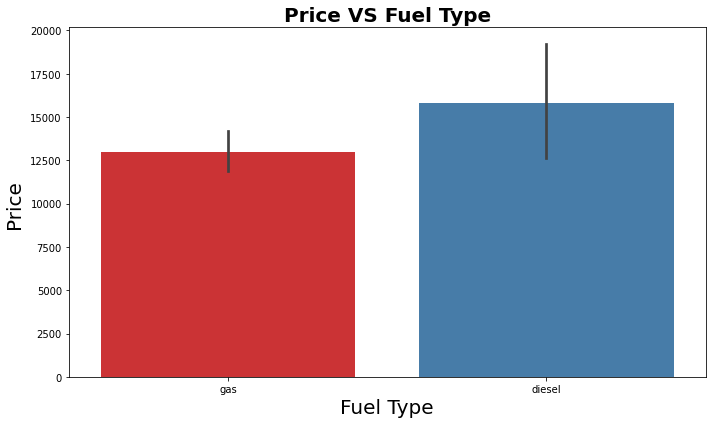

In [114]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
plt.figure(figsize =(10,6))
sns.barplot(y=df['price'],x=df['fueltype'])
plt.title("Price VS Fuel Type",fontsize=20,fontweight ='bold')
plt.xlabel('Fuel Type',fontsize = 20)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()

### Comment :
- **Most of car are Gas operated followed by Diesel. This may be due to low prices of Gas car compare to diesel car.**

### Exploring door number

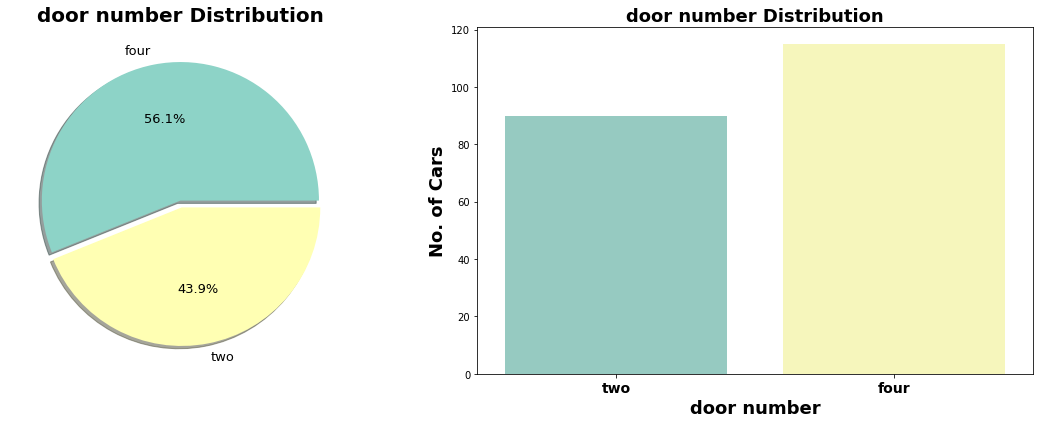

In [115]:
# Exploring Steering Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set3')
f,ax=plt.subplots(1,2,figsize=(16,6))
df['doornumber'].value_counts().plot.pie(explode=[0.0,0.05],autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('door number Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('doornumber',data=df,ax=ax[1])
ax[1].set_title('door number Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("door number",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Cars",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.show()

- **Price Vs door number**

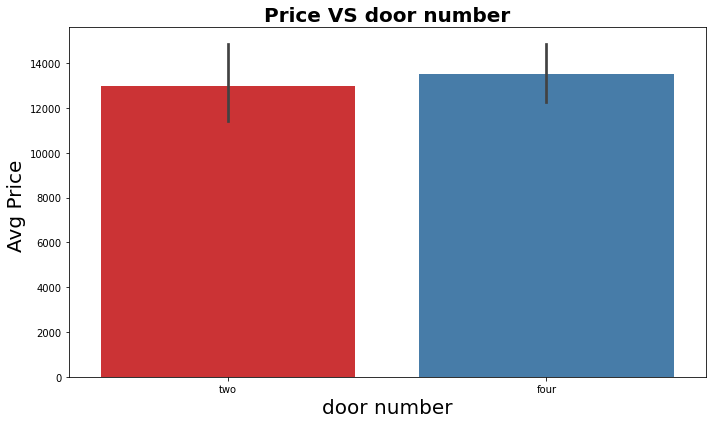

In [116]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
plt.figure(figsize =(10,6))
sns.barplot(y=df['price'],x=df['doornumber'])
plt.title("Price VS door number",fontsize=20,fontweight ='bold')
plt.xlabel('door number',fontsize = 20)
plt.ylabel('Avg Price ',fontsize = 20)
plt.tight_layout()

### Comment :
- **Both 2 and 4 door cars have almost same price**

### Exploring carbody type

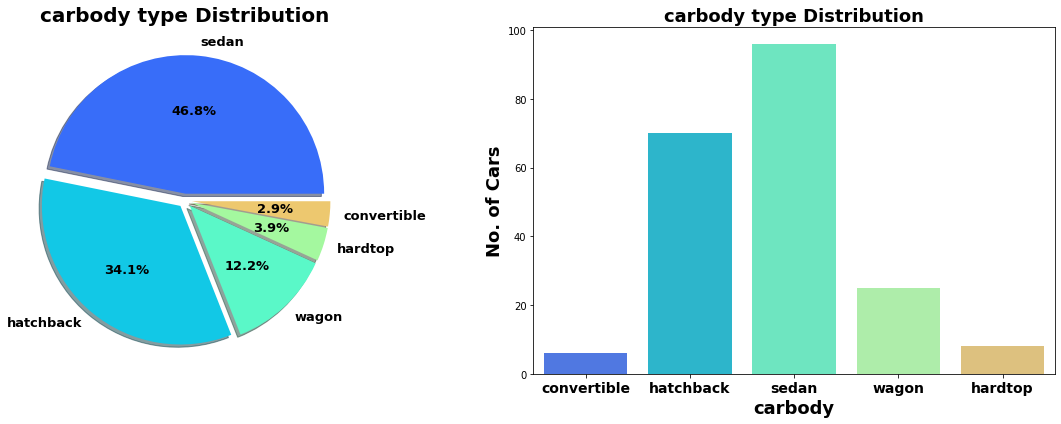

In [117]:
# Exploring Steering Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,6))
df['carbody'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05,0.05],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('carbody type Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('carbody',data=df,ax=ax[1])
ax[1].set_title('carbody type Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("carbody",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Cars",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.show()

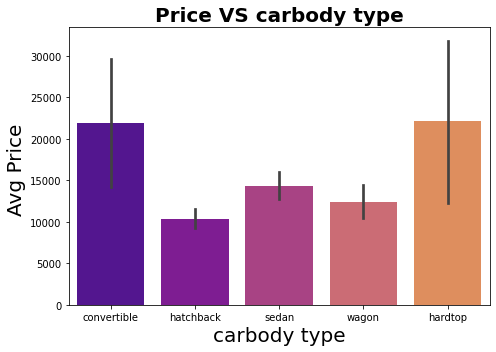

In [118]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('plasma')
plt.figure(figsize =(7,5))
sns.barplot(y=df['price'],x=df['carbody'])
plt.title("Price VS carbody type",fontsize=20,fontweight ='bold')
plt.xlabel('carbody type',fontsize = 20)
plt.ylabel('Avg Price ',fontsize = 20)
plt.tight_layout()

### Comment :
- **hatchback body type is less expensive and 34% car are of hatchback**
- **sedan body type gives best quality at best price thats why it is most used almost 47%**

### Exploring drivewheel

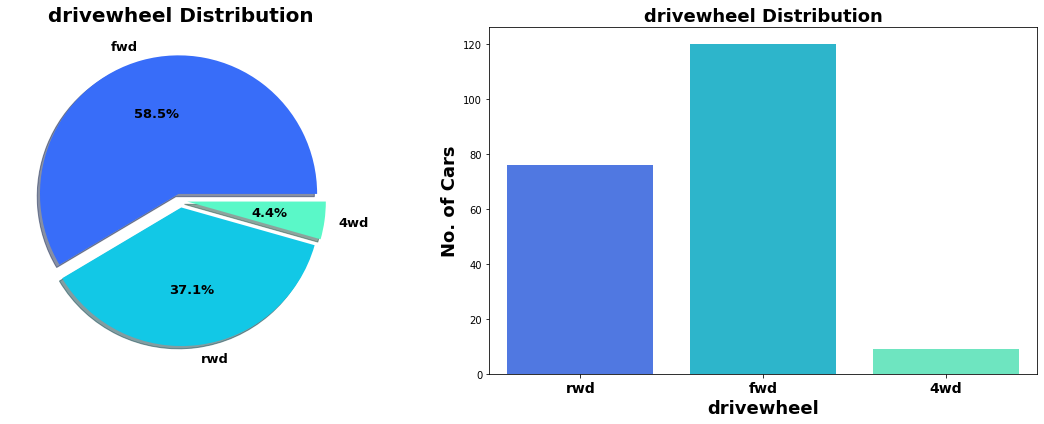

In [119]:
# Exploring drivewheel
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,6))
df['drivewheel'].value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%2.1f%%',
                             textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('drivewheel Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('drivewheel',data=df,ax=ax[1])
ax[1].set_title('drivewheel Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("drivewheel",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Cars",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.show()

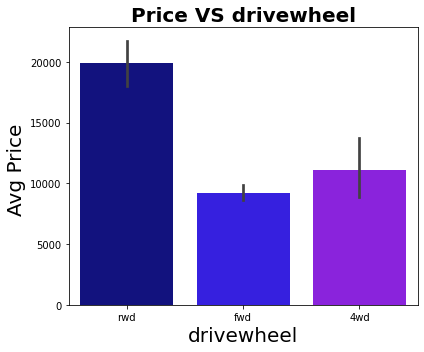

In [120]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot2')
plt.figure(figsize =(6,5))
sns.barplot(y=df['price'],x=df['drivewheel'])
plt.title("Price VS drivewheel",fontsize=20,fontweight ='bold')
plt.xlabel('drivewheel',fontsize = 20)
plt.ylabel('Avg Price ',fontsize = 20)
plt.tight_layout()

### Comment :
- **Most of car are with fwd drive wheel as it's less expensive.**
- **The price of rwd drivwheel is much greater than fwd drivewheel.**

### Exploring Price Vs No of Cylinder

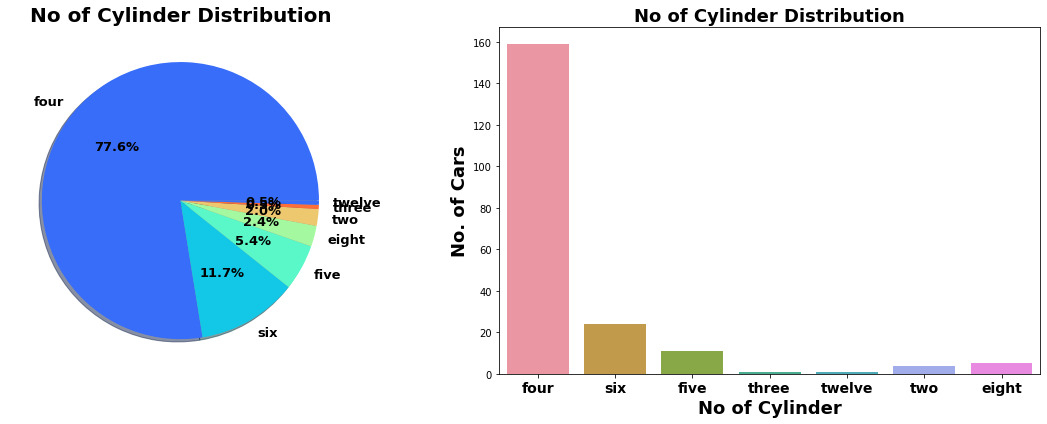

In [121]:
# Exploring Transmission
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,6))
df['cylindernumber'].value_counts().plot.pie(autopct='%2.1f%%',
                             textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('No of Cylinder Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('cylindernumber',data=df,ax=ax[1])
ax[1].set_title('No of Cylinder Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("No of Cylinder",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Cars",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.show()

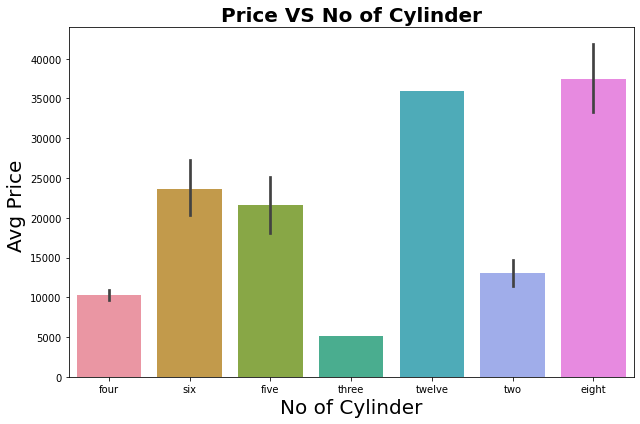

In [122]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot2')
plt.figure(figsize =(9,6))
sns.barplot(y=df['price'],x=df['cylindernumber'])
plt.title("Price VS No of Cylinder",fontsize=20,fontweight ='bold')
plt.xlabel('No of Cylinder',fontsize = 20)
plt.ylabel('Avg Price ',fontsize = 20)
plt.tight_layout()

### Comment :
- **Most of Cars with are 4 cylinder engines followed by 6 cylinder engines.**
- **In terms of Avg Price as number of cylinder increases the avgerage price increases.**

### enginetype Vs Avgerage Price

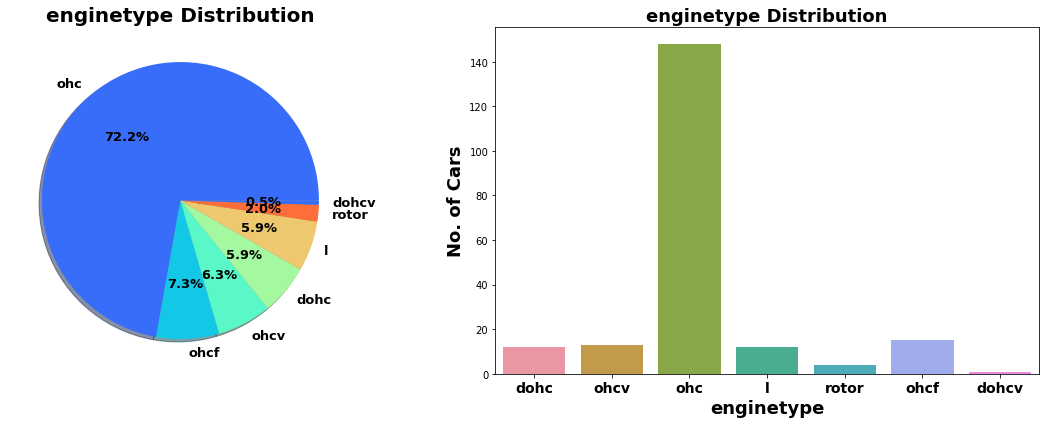

In [123]:
# Exploring enginetype
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,6))
df['enginetype'].value_counts().plot.pie(autopct='%2.1f%%',
                             textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('enginetype Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('enginetype',data=df,ax=ax[1])
ax[1].set_title('enginetype Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("enginetype",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Cars",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.show()

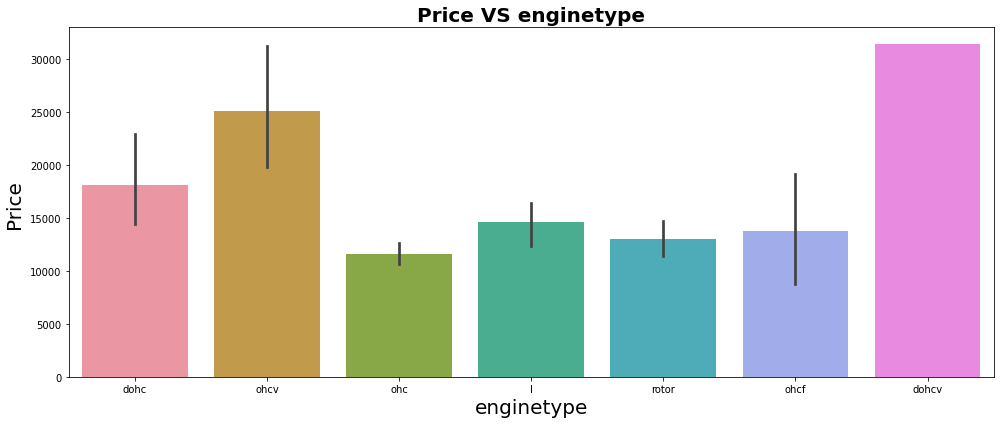

In [124]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot2')
plt.figure(figsize =(14,6))
sns.barplot(y=df['price'],x=df['enginetype'])
plt.title("Price VS enginetype",fontsize=20,fontweight ='bold')
plt.xlabel('enginetype',fontsize = 20)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()

### Comment :
**ohc is less expensive than other and most car uses this.**

### Price VS Milage

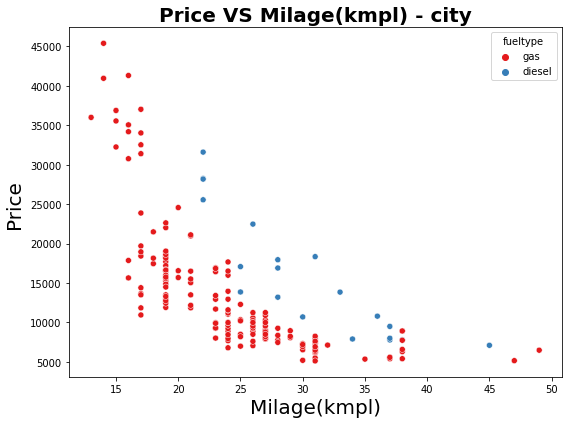

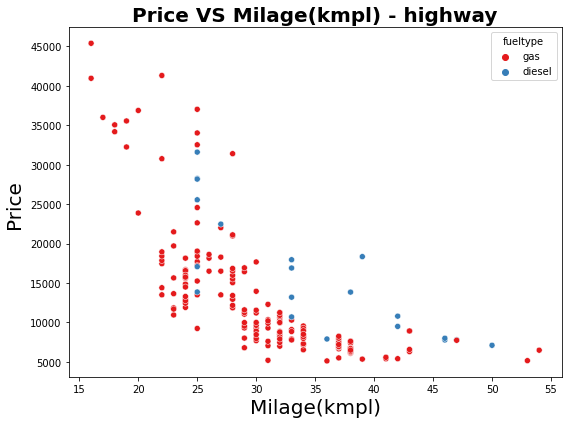

In [125]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
plt.figure(figsize =(8,6))
sns.scatterplot(y=df['price'],x=df['citympg'],hue =df['fueltype'])
plt.title("Price VS Milage(kmpl) - city",fontsize=20,fontweight ='bold')
plt.xlabel('Milage(kmpl)',fontsize = 20)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()
plt.show()

plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
plt.figure(figsize =(8,6))
sns.scatterplot(y=df['price'],x=df['highwaympg'],hue =df['fueltype'])
plt.title("Price VS Milage(kmpl) - highway",fontsize=20,fontweight ='bold')
plt.xlabel('Milage(kmpl)',fontsize = 20)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()
plt.show()

**Milage (kmpl) varies in between 15 to 40 kmpl for most of cars.**
**For Majority cars price is below 25000.**
**We didn't get any other significant relation between price and fueltype.**

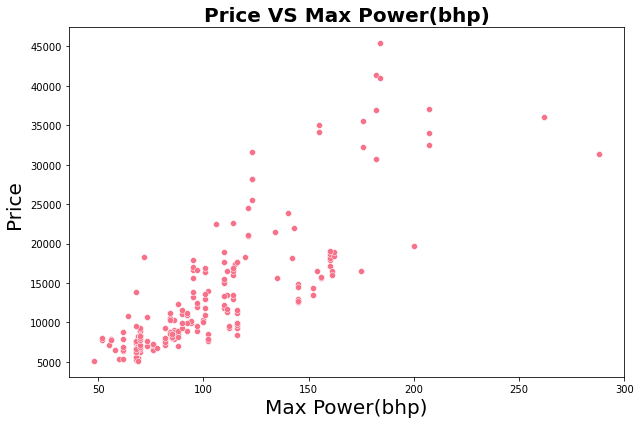

In [126]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
plt.figure(figsize =(9,6))
sns.scatterplot(y=df['price'],x=df['horsepower'])
plt.title("Price VS Max Power(bhp)",fontsize=20,fontweight ='bold')
plt.xlabel('Max Power(bhp)',fontsize = 20)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()
plt.show()

**Majority of cars have max power below 150 bhp.**

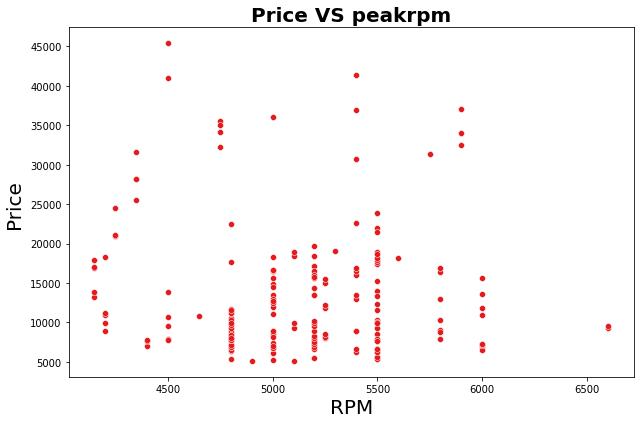

In [127]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
plt.figure(figsize =(9,6))
sns.scatterplot(y=df['price'],x=df['peakrpm'])
plt.title("Price VS peakrpm",fontsize=20,fontweight ='bold')
plt.xlabel('RPM',fontsize = 20)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()
plt.show()

# Feature Engineering

## 1. Encoding Categorical Data 

In [128]:
# Spliting data in Numeric and categorical Variable.
Numerical = ['symboling', 'wheelbase', 'carlength','carwidth', 'carheight', 'curbweight',
             'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm' , 'citympg' , 'citympg' ,'price' ]

Categorical = [ 'brand' , 'fueltype' , 'aspiration', 'doornumber' , 'carbody', 'drivewheel', 
                'enginelocation', 'enginetype' , 'cylindernumber', 'fuelsystem']

In [129]:
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical:
    df[i] = le.fit_transform(df[i])
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,alfa-romero giulia,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,4,2,audi 100 ls,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0,2
4,5,2,audi 100ls,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0,2


In [130]:
df['enginetype'] = le.fit_transform(df['enginetype'])

In [131]:
df['brand'] = le.fit_transform(df['brand'])

In [132]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,alfa-romero giulia,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,4,2,audi 100 ls,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0,2
4,5,2,audi 100ls,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0,2


In [133]:
df.shape

(205, 27)

## 2. Outliers Detection & Removal 

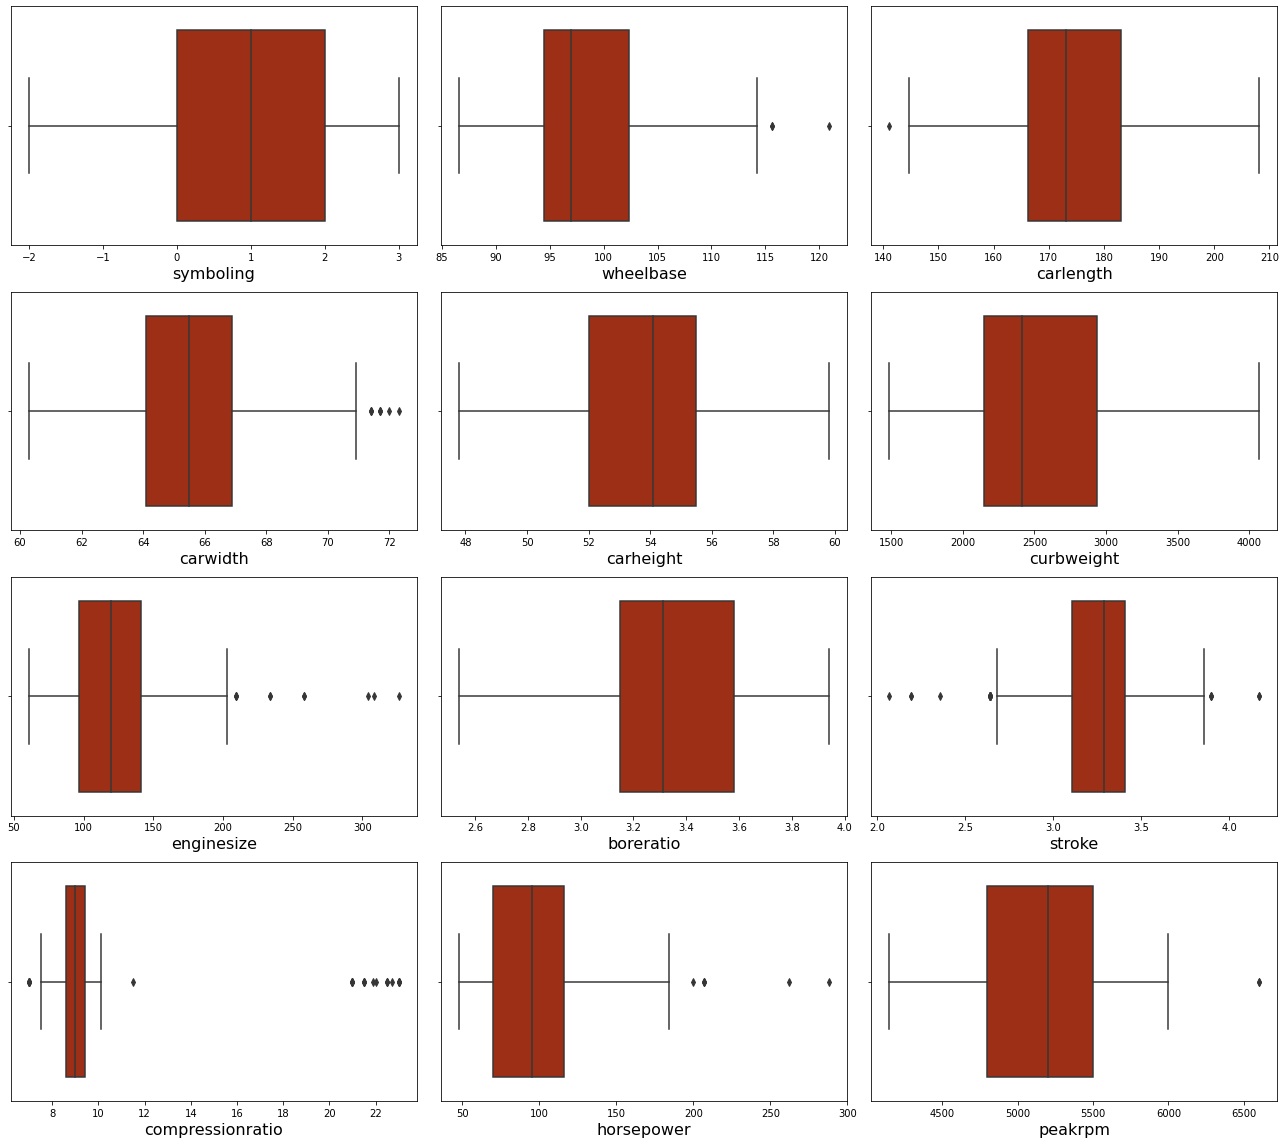

In [134]:
plt.figure(figsize=(18,16), facecolor ='white')
plt_num = 1
for i in Numerical:
    if plt_num <= 12:
        ax = plt.subplot(4,3,plt_num)
        sns.boxplot(df[i], palette='gnuplot')
        plt.xlabel(i, fontsize= 16)
    plt_num += 1
plt.show()

**From Boxplot we can see presense of outliers.**

**Since Data is realstic and data is error-free, we will build model with data we already have without removing outliers. Outliers are realstic data.**

## 3. Correlation

In [135]:
df.corr()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
car_ID,1.000000,-0.151621,-0.125568,0.067729,-0.190352,0.098303,0.051406,0.051483,0.129729,0.170636,0.052387,0.255960,0.071962,-0.075130,-0.040912,-0.033930,0.204898,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093,0.967084
symboling,-0.151621,1.000000,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,0.050372,0.197762,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,-0.091524
fueltype,-0.125568,0.194311,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,-0.233880,-0.284631,-0.217275,0.082695,0.110617,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679,-0.063029
aspiration,0.067729,-0.059866,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,0.300567,0.087311,0.324902,-0.102963,-0.133119,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926,0.021522
doornumber,-0.190352,0.664073,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,-0.398568,-0.207168,-0.552208,-0.197379,0.062431,0.154322,-0.020742,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835,-0.164705
carbody,0.098303,-0.596135,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,0.131710,0.568534,0.128467,-0.037024,-0.048408,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976,0.096025
drivewheel,0.051406,-0.041671,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,0.470751,-0.019719,0.575111,-0.116823,0.223238,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992,-0.041645
enginelocation,0.051483,0.212471,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,-0.051698,-0.106234,0.050468,0.114127,0.135541,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973,0.052188
wheelbase,0.129729,-0.531954,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,0.795144,0.589435,0.776386,-0.135577,-0.184596,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,0.006009
carlength,0.170636,-0.357612,-0.212679,0.234539,-0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,0.841118,0.491029,0.877728,-0.113291,-0.109585,0.683360,0.557810,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920,0.053227


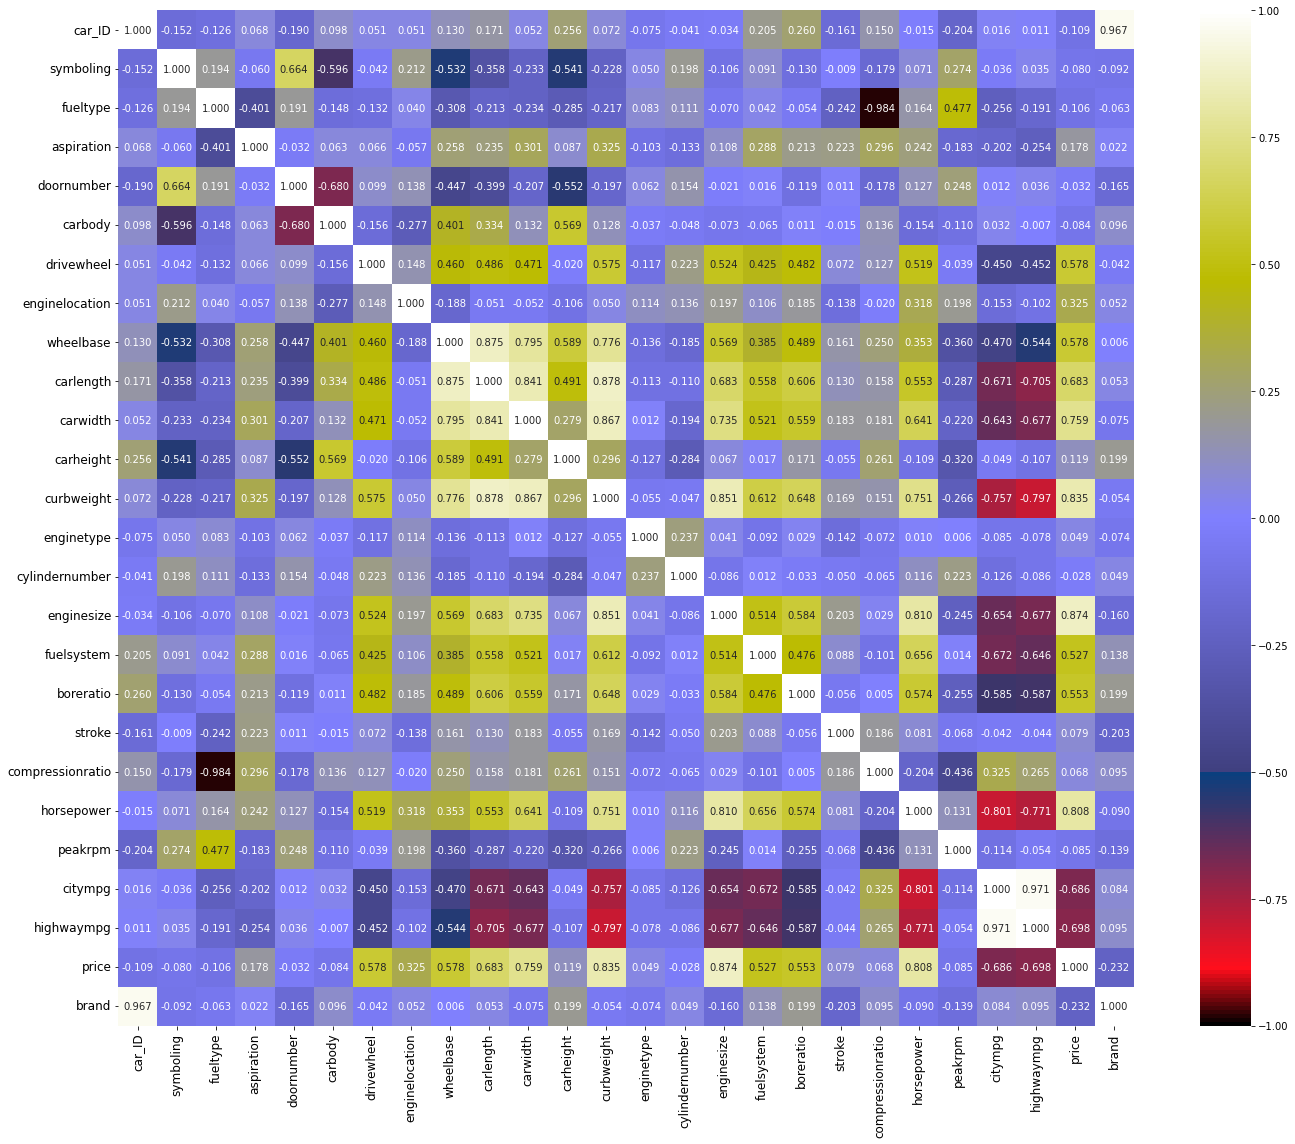

In [136]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),linecolor='black', vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap='gist_stern')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

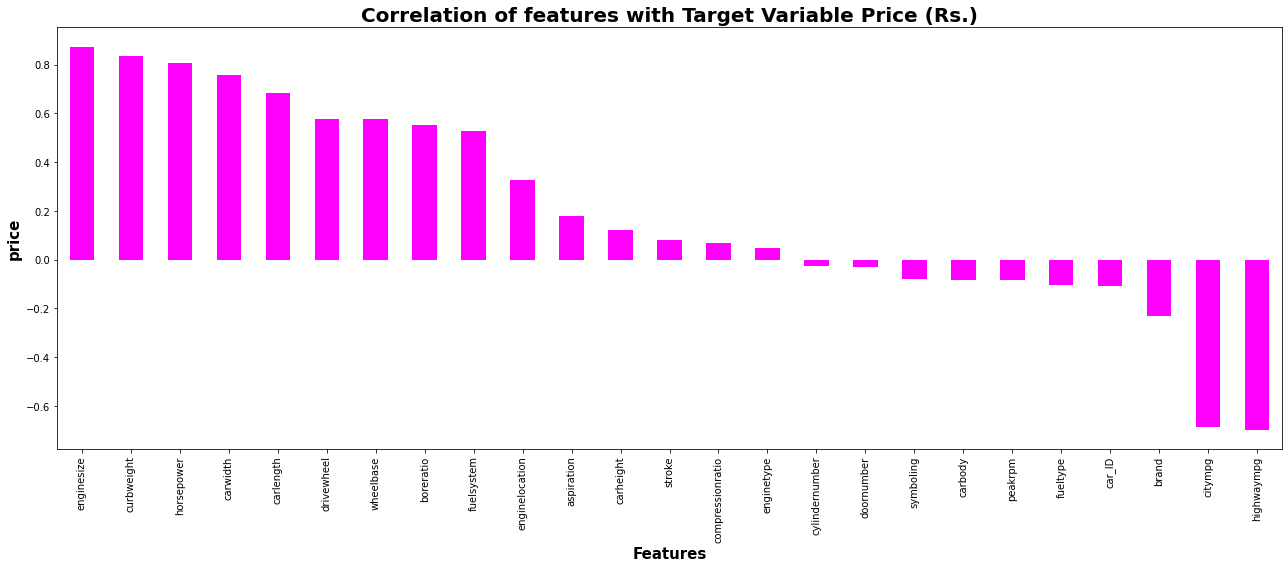

In [137]:
plt.figure(figsize = (18,8))
df.corr()['price'].drop(['price']).sort_values(ascending=False).plot(kind='bar',cmap = 'spring')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('price',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Price (Rs.)',fontsize = 20,fontweight='bold')
plt.show()

#### Observation :
- **Maximum correlation observe in enginesize followed by carweight & horsepower.**
- **Most of features are moderately & poorly correlated with each other.** 
- **cylindernumber very very poorly correlated with each other.**

In [160]:
# Splitting data in target and dependent feature
newdf=df.select_dtypes(include=np.number)
X = newdf.drop(['price'], axis = 1)
Y = df['price']

In [162]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

### **Importing require Machine Learning Library**

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

In [166]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score
from sklearn.model_selection import train_test_split

In [167]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (143, 25)
Training target vector size: (143,)
Test feature matrix size: (62, 25)
Test target vector size: (62,)


In [169]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=i, test_size=.3)
    mod = RandomForestRegressor()
    mod.fit(X_train, Y_train)
    pred = mod.predict(X_test)
    acc=r2_score(Y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9691445241165896  on Random_state  56


In [174]:
RFR=RandomForestRegressor()
RFR.fit(X_train,Y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(Y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(Y_test,pred)))

# Cross Validation Score
scores = cross_val_score(RFR, X, Y, cv = 5).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 95.72344563425526
mean_squared_error: 2489285.399190322
mean_absolute_error: 1111.6958064516132
root_mean_squared_error: 1577.7469376266658

Cross validation score : 38.70356091665522

R2_Score - Cross Validation Score : 57.019884717600036


### XGBRegressor ML Model

In [175]:
XGB=XGBRegressor()
XGB.fit(X_train,Y_train)
pred=XGB.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(Y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(Y_test,pred)))

# Cross Validation on XGB Model
scores = cross_val_score(XGB, X, Y, cv = 5).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 92.81155126069022
mean_squared_error: 4184233.137060973
mean_absolute_error: 1461.8473097278227
root_mean_squared_error: 2045.5398155648236

Cross validation score : 46.43315637158717

R2_Score - Cross Validation Score : 46.378394889103056


### Gradient Boosting Regressor ML Model

In [178]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,Y_train)
pred=GBR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(Y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(Y_test,pred)))

# Cross Validation on Gradient Boosting
scores = cross_val_score(GBR, X, Y, cv = 5).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 95.52269985699593
mean_squared_error: 2606134.96768487
mean_absolute_error: 1131.7878081730169
root_mean_squared_error: 1614.3528014919384

Cross validation score : 52.55539832921142

R2_Score - Cross Validation Score : 42.96730152778451


### Decision Tree Regressor ML Model

In [180]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,Y_train)
pred=DTR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(Y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(Y_test,pred)))
# Cross Validation Score
scores = cross_val_score(DTR, X, Y, cv = 5).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 87.84269099776716
mean_squared_error: 7076494.112903226
mean_absolute_error: 1751.4354838709678
root_mean_squared_error: 2660.1680610260746

Cross validation score : 2.450448367555025

R2_Score - Cross Validation Score : 85.39224263021214


### Bagging Regressor ML Model

In [182]:
BR=BaggingRegressor()
BR.fit(X_train,Y_train)
pred=BR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(Y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(Y_test,pred)))

# Cross Validation Score
scores = cross_val_score(BR, X, Y, cv = 5).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 93.60448084960686
mean_squared_error: 3722686.7893548403
mean_absolute_error: 1334.7032258064519
root_mean_squared_error: 1929.4265441718273

Cross validation score : 23.961114299209108

R2_Score - Cross Validation Score : 69.64336655039776


### Final model Selection

On Basis of difference between R2 Score and Cross Validation Score Decision Tree Regressor is selected as best model with 87.84% r2_score.

We will perform Hyper Parameter tuning over this model

## Hyper Parameter Tunning

In [183]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [184]:
parameter = {'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
             'splitter':['best','random'],
             'max_features':['auto','sqrt','log2'],
             'min_samples_split':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
             'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

In [185]:
GCV=GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [188]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15],
                         'splitter': ['best', 'random']})

In [189]:
GCV.best_params_

{'criterion': 'absolute_error',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_split': 11,
 'splitter': 'best'}

### Final Model

In [190]:
Final_mod=DecisionTreeRegressor(criterion='friedman_mse', max_depth=15, max_features='auto',
                                min_samples_split=4, splitter='random')
Final_mod.fit(X_train,Y_train)
pred=Final_mod.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(Y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(Y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(Y_test, pred)))

R2_Score: 90.29422355689651
mean_squared_error: 5649512.556451612
mean_absolute_error: 1659.1182795698921
RMSE value: 2376.8703280683217


### Final Model is giving us R2 Score of 90.29% which is slightly improved compare to earlier R2 score of 87.84%.
## Saving the model

In [191]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_mod,"Car_Price.pkl")

['Car_Price.pkl']

### Predictions Using Final Model

In [192]:
# Loading the saved model
model=joblib.load("Car_Price.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([10260.33333333, 10695.        , 13361.66666667, 13361.66666667,
       17198.66666667,  5485.5       , 21380.        , 13680.        ,
        5485.5       ,  7982.        , 15591.66666667, 38185.5       ,
        7328.        , 10695.        , 21380.        , 20592.        ,
        9824.        ,  5154.66666667,  7818.        , 18147.        ,
       15447.5       ,  7382.33333333,  5154.66666667, 22767.5       ,
       34028.        , 15499.33333333, 17198.66666667,  9258.        ,
       18770.        , 12170.        , 13499.        ,  6425.        ,
        6425.        ,  7328.        , 13897.66666667, 18147.        ,
        6938.        ,  8916.        , 34028.        , 10695.        ,
       10079.        , 10695.        , 28212.        , 15591.66666667,
        7232.        ,  7382.33333333, 15447.5       ,  7982.        ,
        6691.        ,  7534.        , 28212.        , 13897.66666667,
       12787.        ,  7982.        , 13680.        ,  8921.        ,
      

In [194]:
pd.DataFrame([model.predict(X_test)[:],Y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
Predicted,10260.333333,10695.0,13361.666667,13361.666667,17198.666667,5485.5,21380.0,13680.0,5485.5,7982.0,15591.666667,38185.5,7328.0,10695.0,21380.0,20592.0,9824.0,5154.666667,7818.0,18147.0,15447.5,7382.333333,5154.666667,22767.5,34028.0,15499.333333,17198.666667,9258.0,18770.0,12170.0,13499.0,6425.0,6425.0,7328.0,13897.666667,18147.0,6938.0,8916.0,34028.0,10695.0,10079.0,10695.0,28212.0,15591.666667,7232.0,7382.333333,15447.5,7982.0,6691.0,7534.0,28212.0,13897.666667,12787.0,7982.0,13680.0,8921.0,7328.0,15591.666667,7818.0,5154.666667,10260.333333,17198.666667
Actual,11248.000000,8845.0,8845.000000,10295.000000,15690.000000,5572.0,18420.0,12170.0,5389.0,6989.0,12940.000000,36000.0,7129.0,8495.0,18950.0,31400.0,9639.0,6095.000000,7788.0,13200.0,18150.0,7099.000000,6479.000000,21105.0,37028.0,18280.000000,16558.000000,8358.0,17710.0,16630.0,14399.0,6229.0,6189.0,6855.0,14489.000000,16900.0,6785.0,6295.0,32528.0,10795.0,11259.0,10698.0,25552.0,13295.000000,6695.0,7999.000000,17859.0,7995.0,8916.0,7775.0,31600.0,17075.000000,16500.0,9549.0,11694.0,8921.0,6529.0,15985.000000,7198.0,6795.000000,9295.000000,15750.000000
